In [195]:
import pandas as pd
import seaborn as sns

In [196]:
df = sns.load_dataset("titanic")

In [197]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [199]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [200]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [201]:
df.drop(columns=["deck","who"],inplace=True)

In [202]:
df['age'].fillna(df['age'].median(), inplace=True)

C:\Users\abhinandan\AppData\Local\Temp\ipykernel_3628\1654433547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)


In [203]:
df.dropna(inplace=True)

In [204]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [205]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['age', 'fare']
df[num_features] = scaler.fit_transform(df[num_features])

In [206]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town,alive,alone
0,0,3,male,-0.563674,1,0,-0.500240,S,Third,True,Southampton,no,False
1,1,1,female,0.669217,1,0,0.788947,C,First,False,Cherbourg,yes,False
2,1,3,female,-0.255451,0,0,-0.486650,S,Third,False,Southampton,yes,True
3,1,1,female,0.438050,1,0,0.422861,S,First,False,Southampton,yes,False
4,0,3,male,0.438050,0,0,-0.484133,S,Third,True,Southampton,no,True


In [216]:
from sklearn.preprocessing import LabelEncoder
obj_cols = ['adult_male', 'embarked', 'alive', 'alone', 'embark_town', 'class']
obj_df = df[obj_cols].copy()  

label_enc = LabelEncoder()
for col in obj_df.select_dtypes(include=['object', 'category']).columns:
    obj_df[col] = label_enc.fit_transform(obj_df[col].astype(str))

num_df = df.drop(columns=obj_cols)

full_df = pd.concat([num_df, obj_df], axis=1)


In [217]:
full_df

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,embarked,alive,alone,embark_town,class
0,0,3,male,-0.563674,1,0,-0.500240,True,2,0,False,2,2
1,1,1,female,0.669217,1,0,0.788947,False,0,1,False,0,0
2,1,3,female,-0.255451,0,0,-0.486650,False,2,1,True,2,2
3,1,1,female,0.438050,1,0,0.422861,False,2,1,False,2,0
4,0,3,male,0.438050,0,0,-0.484133,True,2,0,True,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,-0.178396,0,0,-0.384475,True,2,0,True,2,1
887,1,1,female,-0.794841,0,0,-0.042213,False,2,1,True,2,0
888,0,3,female,-0.101340,1,2,-0.174084,False,2,0,False,2,2
889,1,1,male,-0.255451,0,0,-0.042213,True,0,1,True,0,0


In [218]:
import matplotlib.pyplot as plt

<Axes: xlabel='survived', ylabel='sex'>

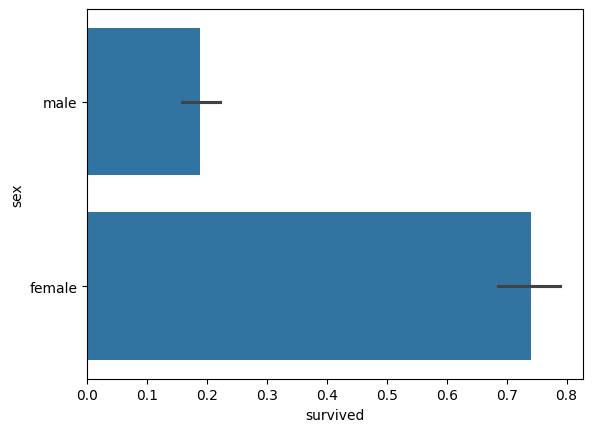

In [219]:
sns.barplot(x='survived',y="sex",data=full_df)

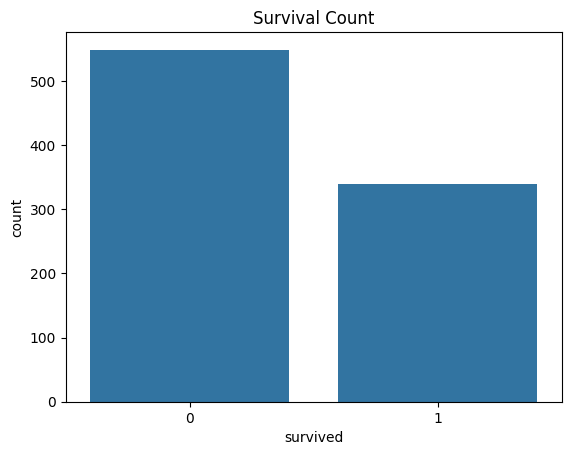

In [221]:
sns.countplot(x='survived', data=full_df)
plt.title("Survival Count")
plt.show()

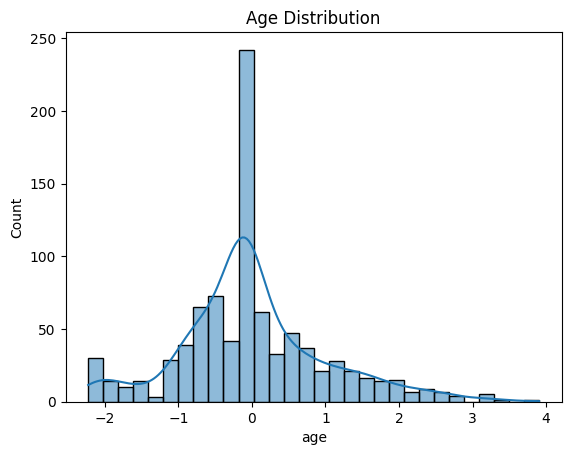

In [222]:
sns.histplot(full_df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

In [223]:
a = df.groupby("sex")["fare"].sum()
a

sex
female    76.354602
male     -76.354602
Name: fare, dtype: float64

In [ ]:
x = full_df[[]]

In [224]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split()